# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**

Данные геологоразведки трёх регионов находятся в файлах:
- /datasets/geo_data_0.csv. 
- /datasets/geo_data_1.csv. 
- /datasets/geo_data_2.csv. 


* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [ ]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from itertools import groupby

In [ ]:
#Загрузка датасетов
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
#Общая информация о загруженных данных
for i in [data_1, data_2, data_3]:
    print(i.info())
    print('Уникальных id:', len(i['id'].unique()))
    print('Полных дубликатов', i.duplicated().sum())
    print('*'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Уникальных id: 99990
Полных дубликатов 0
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Уникальных id: 99996
Полных дубликатов 0

В трех датасетах содержится по 100 тысяч строк, пропусков нет.

Однако, есть повторяющиеся id: 10 для первого региона и по 4 для второго и третьего (это без приведения к нижнему регистру).

In [ ]:
#Функция поиска дубликатов
def duplicate(column):
    duplicates = {}
    for el, group in groupby(sorted(column)):
        count = len(list(group))
        if count > 1:
            duplicates[el] = count

    print(duplicates)

In [ ]:
#Дубликаты id
duplicate(data_1['id'])

{'74z30': 2, 'A5aEY': 2, 'AGS9W': 2, 'HZww2': 2, 'QcMuo': 2, 'Tdehs': 2, 'TtcGQ': 2, 'bsk9y': 2, 'bxg6G': 2, 'fiKDv': 2}


In [ ]:
data_1[data_1['id'] == '74z30']

,id,f0,f1,f2,product
64022,74z30,0.741456,0.459229,5.153109,140.771492
66136,74z30,1.084962,-0.312358,6.990771,127.643327


Одинаковым id соответсвуют разные значения других признаков, все повторяющиеся id встечаются два раза.

In [ ]:
duplicate(data_1['id'].str.lower())

{'1sqvs': 2, '2phtu': 2, '2qwma': 2, '3unrm': 2, '5dnzj': 2, '74z30': 2, '7zuef': 2, '94egn': 2, '94xtx': 2, '9rkcu': 2, 'a5aey': 2, 'ags9w': 2, 'ajvfz': 2, 'b6dzo': 2, 'bfkqn': 2, 'bkzro': 2, 'bqlxc': 2, 'bsk9y': 2, 'buqcz': 2, 'bxg6g': 2, 'bymmp': 2, 'dgkct': 2, 'dj9gk': 2, 'dkud7': 2, 'dpvbg': 2, 'dsaar': 2, 'dwq3j': 2, 'el4n0': 2, 'elfng': 2, 'evnxd': 2, 'fasjm': 2, 'fejkn': 2, 'fikdv': 2, 'fugrf': 2, 'gcrjd': 2, 'gtvcc': 2, 'gyiz2': 2, 'hhlcy': 2, 'hnjbu': 2, 'hzww2': 2, 'icptm': 2, 'ifgrj': 2, 'ilkwc': 2, 'iu9sq': 2, 'jggye': 2, 'jihuv': 2, 'jqqnk': 2, 'k8uqc': 2, 'klet5': 2, 'l5fmt': 2, 'lcokp': 2, 'lemty': 2, 'lfw9w': 2, 'm9hvo': 2, 'mgbsp': 2, 'na4ga': 2, 'nvekv': 2, 'nxmhp': 2, 'nxqzx': 2, 'o7irh': 2, 'ocw1d': 2, 'oejbb': 2, 'ov4ms': 2, 'oxltr': 2, 'oznoo': 2, 'p8ngy': 2, 'pcvrd': 2, 'pixsi': 2, 'psulx': 2, 'puyuv': 2, 'qcmuo': 2, 'qncns': 2, 'qw6lh': 2, 'qztae': 2, 'rhndt': 2, 'rmsho': 2, 'rsutw': 2, 'rtymt': 2, 'rvgan': 2, 'safiv': 2, 'sn4s3': 2, 'stkqq': 2, 'swddr': 2, 't6

После приведения к нижнему регистру количество повторяющихся id увеличилось, встречаются все также парами. 

Что с этим делать не ясно: отличаются ли скважины с разным написанием id, почему встречаются с одинаковыми id, но разнами значениями.

Требуется уточнить у заказчика возможную причину данной проблемы.

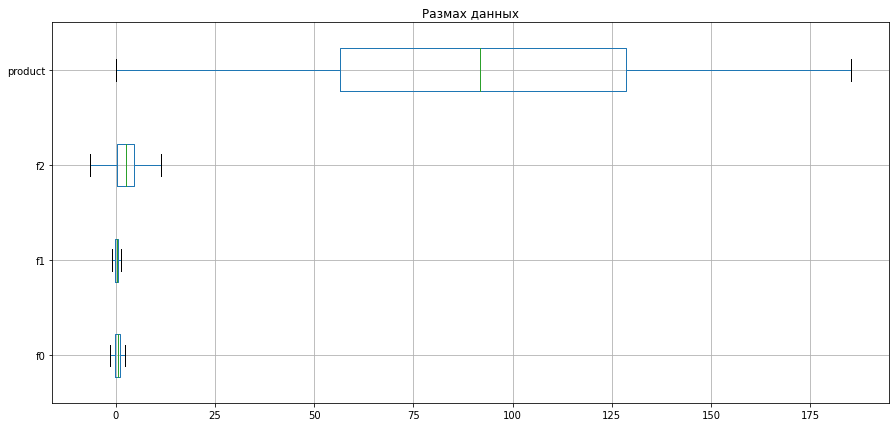

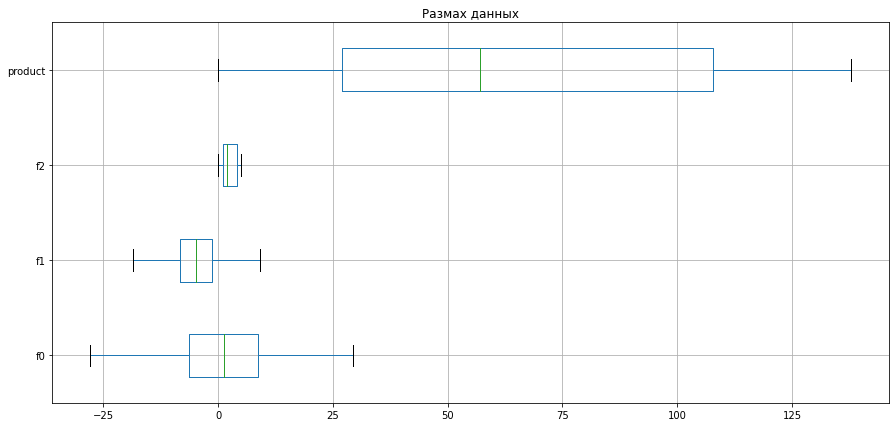

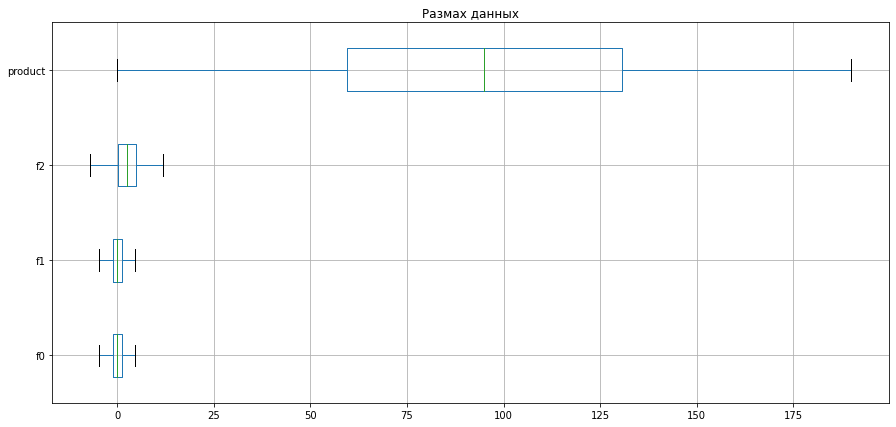

In [ ]:
#Диаграммы размаха данных
for i in [data_1, data_2, data_3]:
    i.boxplot(column=['f0','f1', 'f2', 'product'], sym='', figsize=(15, 7), vert=False)
    plt.title('Размах данных')
    plt.show()

Для проверки на мультиколлиниарность построим тепловые карты для трех выборок.

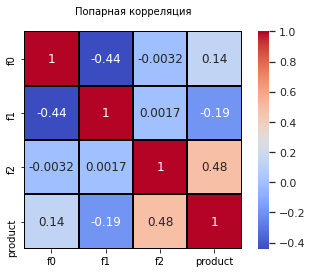

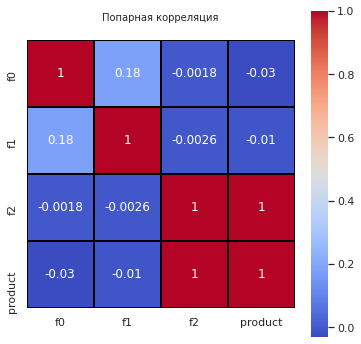

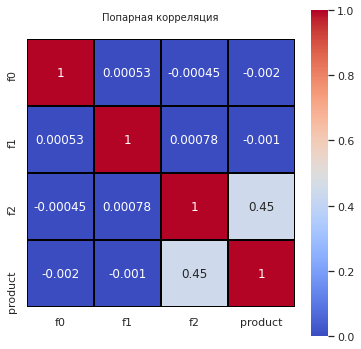

In [ ]:
#Тепловые карты для трех выборок
for i in [data_1, data_2, data_3]:
    plt.title('Попарная корреляция', y = 1.05, size = 10)
    sns.set(rc={"figure.figsize": (6, 6)})
    sns.heatmap(
        i.corr(), 
        annot = True,
        cmap = 'coolwarm', 
        square= True, 
        linewidths=1,
        linecolor='black')
    plt.show()

Для всех выборок характерна корреляция признака f2 и product. Однако в данных для второго региона зависимость этих показателей прямая.

По диаграммам размаха и тепловым картам можно сказать, что регион 2 отличается от региона 1 и 3: медиана объема запасов сильно меньше.

## Обучение и проверка модели

In [ ]:
predictions = []
true = []
for data in [data_1, data_2, data_3]:
#Разделение выборок на тестовую и валидационную
    features = data.drop(columns=['product','id'])
    target = data['product']

    features_train, features_valid, target_train, target_valid = train_test_split(
        features, 
        target, 
        test_size=0.25, 
        train_size=0.75)
#Обучение моделей    
    model = LinearRegression()
    model.fit(features_train, target_train)
    y_pred_valid = model.predict(features_valid)
    predictions.append(y_pred_valid)
    true.append(target_valid)
    print('Средний запас предсказанного сырья:', y_pred_valid.mean())
    print('RMSE модели:', (mean_squared_error(target_valid, y_pred_valid))**(1/2))
    print('*'*40)

Средний запас предсказанного сырья: 92.59262394195822
RMSE модели: 37.75936419888545
****************************************
Средний запас предсказанного сырья: 68.9853757142503
RMSE модели: 0.8911009923282397
****************************************
Средний запас предсказанного сырья: 94.97970526303284
RMSE модели: 39.99408520914196
****************************************


RMSE data_1 и data_3 существенно выше, чем у data_2.

In [ ]:
#Предсказания и правильные ответы на валидационной выборке для региона 1.
data_1_pred = pd.DataFrame(predictions[0], columns =['predict'])
data_1_pred['target_valid'] = pd.DataFrame(true[0]).reset_index()['product']
data_1_pred

,predict,target_valid
0,119.993696,169.641739
1,125.596090,173.660536
2,63.729259,62.031774
3,98.995847,32.012817
4,108.761442,117.557214
...,...,...
24995,62.830832,31.574286
24996,135.769226,178.804484
24997,76.399986,40.909558
24998,101.333114,157.420351


In [ ]:
#Предсказания и правильные ответы на валидационной выборке для региона 2.
data_2_pred = pd.DataFrame(predictions[1], columns =['predict'])
data_2_pred['target_valid'] = pd.DataFrame(true[1]).reset_index()['product']
data_2_pred

,predict,target_valid
0,56.838971,57.085625
1,137.800118,137.945408
2,-0.304927,0.000000
3,0.644186,0.000000
4,56.334888,57.085625
...,...,...
24995,85.083477,84.038886
24996,136.277247,137.945408
24997,2.681011,3.179103
24998,134.032525,134.766305


In [ ]:
#Предсказания и правильные ответы на валидационной выборке для региона 3.
data_3_pred = pd.DataFrame(predictions[2], columns =['predict'])
data_3_pred['target_valid'] = pd.DataFrame(true[2]).reset_index()['product']
data_3_pred

,predict,target_valid
0,108.587110,154.077629
1,105.343440,109.018548
2,105.293597,109.266789
3,129.747808,186.790537
4,82.655014,84.188394
...,...,...
24995,75.823664,55.490503
24996,104.656936,146.010122
24997,94.031541,78.362217
24998,96.732579,30.857493


## Подготовка к расчёту прибыли

Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [ ]:
#Стоимость тысячи баррелей, бюджет на разработку
PRICE = 450000
BUDGET = 10000000000
N_OF_WELLS = 200
N_OF_POINTS = 500

#Достаточный объём сырья в регионе для безубыточной разработки.
print('Достаточный объём сырья в регионе для безубыточной разработки:', BUDGET/PRICE)

#Достаточный объём сырья в скважине.
print('Достаточный объём сырья в скважине для безубыточной разработки:', BUDGET/PRICE/N_OF_WELLS)

Достаточный объём сырья в регионе для безубыточной разработки: 22222.222222222223
Достаточный объём сырья в скважине для безубыточной разработки: 111.11111111111111


Для покрытия затрат на разработку в регионе необходимо наличие 22,2 млн баррелей.

## Расчёт прибыли и рисков 

In [ ]:
#Функция для расчета прибыли на основе 200 скважин с самыми высокими значениями

def revenue(target,predict, count):
    probs_sorted = predict.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return ((selected.sum()*PRICE - BUDGET)).round(2)

In [ ]:
#Расчет прибыли на основе 200 скважин с самыми высокими значениями

for i in [data_1_pred, data_2_pred, data_3_pred]:
    target = i['target_valid']
    probabilities = i['predict']
    print('Прибыль:', revenue(target, probabilities, 200))

Прибыль: 3245497250.23
Прибыль: 2415086696.68
Прибыль: 2244010576.62


In [ ]:
#Средняя прибыль, 95%-й доверительный интервал и риск убытков.

state = np.random.RandomState(12345)

for i in [data_1_pred, data_2_pred, data_3_pred]:
    target = i['target_valid']
    probabilities = i['predict']   
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=N_OF_POINTS, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        profit = revenue(target_subsample, probs_subsample, N_OF_WELLS)
        values.append(profit)

    values = pd.Series(values)
    losses = (values<0).mean()*100
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)

    mean = values.mean()
    print("Средняя прибыль:", mean)
    print("Доверительный интервал:", lower,'-', upper)
    if losses < 2.5:
        print('Подходит для разработки, риск убытков:', losses)
    else:
        print('Подходит для разработки, риск убытков:', losses)
    print('*'*60)

Средняя прибыль: 456329045.86275
Доверительный интервал: -92584246.91799998 - 1002803481.6865
Подходит для разработки, риск убытков: 4.6
************************************************************
Средняя прибыль: 526915409.07791
Доверительный интервал: 116465427.70150001 - 986501143.8422499
Подходит для разработки, риск убытков: 0.8999999999999999
************************************************************
Средняя прибыль: 404234254.73968
Доверительный интервал: -138659809.43425 - 976207015.02125
Подходит для разработки, риск убытков: 7.9
************************************************************


Наиболее подходящим для разработки с точки зрения потенциальной прибыли является регион 2, так как ему соответсвует наибольшая средняя прибыль и самый маленький риск убытков.